In [125]:
def Laplace_Jacobi_slow(Phi):
    # Don't use, very slow AND inefficient
    Phi_new = Phi.copy()
    Nx, Ny = Phi.shape
    for xi in range(1, Nx-1):
        for yj in range(1, Ny-1):
            Phi_new[xi, yj] = 0.25*(Phi[xi+1, yj] + Phi[xi-1, yj]
                                  + Phi[xi, yj+1] + Phi[xi, yj-1])
    Phi[:, :] = Phi_new
    return Phi

In [126]:
def Laplace_Jacobi(Phi):
    """One update in the Jacobi algorithm"""
    Phi[1:-1, 1:-1] = 0.25*(Phi[2:, 1:-1] + Phi[0:-2, 1:-1] + Phi[1:-1, 2:] + Phi[1:-1, 0:-2])
    return Phi

In [127]:
def Laplace_Gauss_Seidel(Phi):
    """One update in the Gauss-Seidel algorithm"""
    Nx, Ny = Phi.shape
    for xi in range(1, Nx-1):
        for yj in range(1, Ny-1):
            Phi[xi, yj] = 0.25*(Phi[xi+1, yj] + Phi[xi-1, yj]
                                + Phi[xi, yj+1] + Phi[xi, yj-1])
    return Phi

In [128]:
def Laplace_Gauss_Seidel_odd_even(Phi):
    """One update in the Gauss-Seidel algorithm on odd or even fields"""
    # odd update (uses old even)
    Phi[1:-2:2, 1:-2:2] = 0.25*(Phi[2::2, 1:-2:2] + Phi[0:-2:2, 1:-2:2] + Phi[1:-2:2, 2::2] + Phi[1:-2:2, 0:-2:2])
    Phi[2:-1:2, 2:-1:2] = 0.25*(Phi[3::2, 2:-1:2] + Phi[1:-2:2, 2:-1:2] + Phi[2:-1:2, 3::2] + Phi[2:-1:2, 1:-2:2])
    
    # even update (uses new odd)
    Phi[1:-2:2, 2:-1:2] = 0.25*(Phi[2::2, 2:-1:2] + Phi[0:-2:2, 2:-1:2] + Phi[1:-2:2, 3::2] + Phi[1:-2:2, 1:-1:2])
    Phi[2:-1:2, 1:-2:2] = 0.25*(Phi[3::2, 1:-2:2] + Phi[1:-2:2, 1:-2:2] + Phi[2:-1:2, 2::2] + Phi[2:-1:2, 0:-2:2])
    return Phi

In [129]:
import numpy as np
test = np.array([[1,2], [3,4],[5,6],[7,8],[9,10], [11,12], [13,14], [15, 16]])

# print(test)
# print('@@')

# print(test[1:-2:2, 1:-2:2])

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [131]:
# for interactive work
%matplotlib widget

In [132]:
%matplotlib inline

In [133]:
def plot_contour(Phi, filename=None, zlabel=r"potential $\Phi$ (V)",
                 cmap=plt.cm.coolwarm):
    """Plot Phi as a contour plot.
    
    Arguments
    ---------
    Phi : 2D array
          potential on lattice
    filename : string or None, optional (default: None)
          If `None` then show the figure and return the axes object.
          If a string is given (like "contour.png") it will only plot 
          to the filename and close the figure but return the filename.
    cmap : colormap
          pick one from matplotlib.cm          
    """
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)

    x = np.arange(Phi.shape[0])
    y = np.arange(Phi.shape[1])
    X, Y = np.meshgrid(x, y)
    Z = Phi[X, Y]
    cset = ax.contourf(X, Y, Z, 20, cmap=cmap)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect(1)

    cb = fig.colorbar(cset, shrink=0.5, aspect=5)
    cb.set_label(zlabel)
    
    if filename:
        fig.savefig(filename)
        plt.close(fig)
        return filename
    else:
        return ax
    

def plot_surf(Phi, filename=None, offset=-20, zlabel=r'potential $\Phi$ (V)',
             elevation=40, azimuth=-65, cmap=plt.cm.coolwarm):
    """Plot Phi as a 3D plot with contour plot underneath.
    
    Arguments
    ---------
    Phi : 2D array
          potential on lattice
    filename : string or None, optional (default: None)
          If `None` then show the figure and return the axes object.
          If a string is given (like "contour.png") it will only plot 
          to the filename and close the figure but return the filename.
    offset : float, optional (default: 20)
          position the 2D contour plot by offset along the Z direction
          under the minimum Z value
    zlabel : string, optional
          label for the Z axis and color scale bar
    elevation : float, optional
          choose elevation for initial viewpoint
    azimuth : float, optional
          chooze azimuth angle for initial viewpoint
    cmap : colormap
          pick one from matplotlib.cm
    """
     
    x = np.arange(Phi.shape[0])
    y = np.arange(Phi.shape[1])
    X, Y = np.meshgrid(x, y)
    Z = Phi[X, Y]
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.5, color="gray")
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.6)
    cset = ax.contourf(X, Y, Z, 20, zdir='z', offset=offset+Z.min(), cmap=cmap)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel(zlabel)
    ax.set_zlim(offset + Z.min(), Z.max())
    
    ax.view_init(elev=elevation, azim=azimuth)

    cb = fig.colorbar(surf, shrink=0.5, aspect=5)
    cb.set_label(zlabel)
    
    if filename:
        fig.savefig(filename)
        plt.close(fig)
        return filename
    else:
        return ax

In [134]:
from tqdm import tqdm

In [135]:
#Max_iter=30000
# tol = 1e-3
# Nmax = 100
# Phi = np.zeros((Nmax, Nmax), dtype=np.float64)
# Phi_old = np.zeros_like(Phi)

# initialize boundaries
# everything starts out zero so nothing special for the grounded wires
# Phi[0, :] = 100     # wire at x=0 at 100 V

# for n_iter in tqdm(range(Max_iter)):
#     Phi_old[:, :] = Phi
#     Phi = Laplace_Gauss_Seidel_odd_even(Phi)
#     DeltaPhi = np.linalg.norm(Phi - Phi_old)
#     if DeltaPhi < tol:
#         print("Laplace_Gauss_Seidel_odd_even converged in {0} iterations to {1}".format(n_iter+1, DeltaPhi))
#         break
# else:
#     print("Laplace_Gauss_Seidel_odd_even did NOT converge in {0} iterations, DeltaPhi={1}".format(n_iter+1, DeltaPhi))
    

In [136]:
# Max_iter=10000
# tol = 1e-3
# Nmax = 1000
# omega = 1.99

# Phi = np.zeros((Nmax, Nmax), dtype=np.float64)
# Phi_old = np.zeros_like(Phi)
# residual = np.zeros_like(Phi)

# # initialize boundaries
# # everything starts out zero so nothing special for the grounded wires
# Phi[0, :] = 100     # wire at x=0 at 100 V
# Phi[:,0] = -100
# for n_iter in tqdm(range(Max_iter)):
#     Phi_old[:, :] = Phi
#     Phi = Laplace_Gauss_Seidel_odd_even(Phi)
#     residual[:, :] = Phi - Phi_old
#     DeltaPhi = np.linalg.norm(residual)
#     if DeltaPhi < tol:
#         print("SOR converged in {0} iterations to {1}".format(n_iter+1, DeltaPhi))
#         break
#     # SOR
#     Phi[:, :] = Phi_old + omega*residual  # = omega*Phi + (1-omega)*Phi_old
# else:
#     print("SOR did NOT converge in {0} iterations, DeltaPhi={1}".format(n_iter+1, DeltaPhi))


In [137]:
# plot_surf(Phi);
# plot_contour(Phi);

In [138]:
#full solution starts here 

In [139]:

import numpy as np

def Poisson_Jacobi(Phi, rho, Delta=1.):
    """One update in the Jacobi algorithm for Poisson's equation"""    
    Phi[1:-1, 1:-1] = 0.25*(Phi[2:, 1:-1] + Phi[0:-2, 1:-1] + Phi[1:-1, 2:] + Phi[1:-1, 0:-2]) \
                      + np.pi * Delta**2 * rho[1:-1, 1:-1]
    return Phi

def Poisson_Gauss_Seidel(Phi, rho, Delta=1.):
    """One update in the Gauss-Seidel algorithm for Poisson's equation"""    
    Nx, Ny = Phi.shape
    for xi in range(1, Nx-1):
        for yj in range(1, Ny-1):
            Phi[xi, yj] = 0.25*(Phi[xi+1, yj] + Phi[xi-1, yj]
                                + Phi[xi, yj+1] + Phi[xi, yj-1]) \
                            + np.pi * Delta**2 * rho[xi, yj]
    return Phi

def Poisson_Gauss_Seidel_odd_even(Phi, rho, Delta=1.):
    """One update in the Gauss-Seidel algorithm on odd or even fields"""
    a = np.pi * Delta**2
    # odd update (uses old even)
    Phi[1:-2:2, 1:-2:2] = 0.25*(Phi[2::2, 1:-2:2] + Phi[0:-2:2, 1:-2:2] 
                                + Phi[1:-2:2, 2::2] + Phi[1:-2:2, 0:-2:2]) + a * rho[1:-2:2, 1:-2:2]
    Phi[2:-1:2, 2:-1:2] = 0.25*(Phi[3::2, 2:-1:2] + Phi[1:-2:2, 2:-1:2] 
                                + Phi[2:-1:2, 3::2] + Phi[2:-1:2, 1:-2:2]) + a * rho[2:-1:2, 2:-1:2]
    
    # even update (uses new odd)
    Phi[1:-2:2, 2:-1:2] = 0.25*(Phi[2::2, 2:-1:2] + Phi[0:-2:2, 2:-1:2] 
                                + Phi[1:-2:2, 3::2] + Phi[1:-2:2, 1:-1:2]) + a * rho[1:-2:2, 2:-1:2]
    Phi[2:-1:2, 1:-2:2] = 0.25*(Phi[3::2, 1:-2:2] + Phi[1:-2:2, 1:-2:2] 
                                + Phi[2:-1:2, 2::2] + Phi[2:-1:2, 0:-2:2]) + a * rho[2:-1:2, 1:-2:2]
    return Phi

In [140]:
Nmax = 750
Max_iter = 100000
omega = 1.99
tol = 1e-2
echarge = 1.60217663*10**(-19)
eps0 = 8.854*10**(-12)
len_trap = 2e-2
thic = 1e-3
r_ebeam = 35 #micrometers - radius of electron beam
r_dtube = 0.5e3 #micrometers - radius of middle drift tube 
#r_dtube = 10*r_ebeam
t_dtube = 100
px = r_dtube*1.1
py = px 
qV =  4*10**(12)*100**(3) * 1e-2* np.pi * (r_ebeam*10**(-6))**2#electron charge density m^-2
tempest = 1.1e7 #temperature estimated in Kelvin assuming thermal equilibrium with electrons 

print(qV)
V_dtube = 200

Nion = 1e12
Zion = 65
#kT = 2e-12
kT = 0.5


def boltzfun(V, q, kT): 
    return np.exp(-q*V/kT)

Phi = np.zeros((Nmax, Nmax), dtype=np.float64)
Phi_old = np.zeros_like(Phi)
rho = np.zeros_like(Phi)
residual = np.zeros_like(Phi)
centerx, centery = 0, 0

# initialize boundaries
for i in range(Nmax):
    
    for j in range(Nmax):
        xval = px*(0.5-(i/Nmax))
        yval = py*(0.5-(j/Nmax))

        if np.sqrt((xval)**2 + (yval)**2) < r_dtube: 
            Phi[i,j] = 0
        else:
            Phi[i,j] = 250


#initialize charge distribution 

for i in range(Nmax):

    for j in range(Nmax):
        xval = px*(0.5-(i/Nmax))
        yval = py*(0.5-(j/Nmax))

        if np.sqrt((xval)**2 + (yval)**2) >= r_ebeam: 
            rho[i,j] = 0
        else: 
            rho[i,j] = -qV*echarge#*(len_trap)

#plot_contour(rho)
#plot_surf(Phi, elevation=40, azimuth=20)
Delta = px/Nmax

for n_iter in tqdm(range(Max_iter)):
    #print(n_iter)
    Phi_old[:, :] = Phi
    Phi = Poisson_Gauss_Seidel_odd_even(Phi, rho, Delta=Delta)
    residual[:, :] = Phi - Phi_old
    DeltaPhi = np.linalg.norm(residual)
    if DeltaPhi < tol:
        print("SOR converged in {0} iterations to {1}".format(n_iter+1, DeltaPhi))
        break
    # SOR
    Phi[:, :] = omega*Phi + (1-omega)*Phi_old #Phi_old + omega*residual # = 
else:
    print("SOR did NOT converge in {0} iterations, DeltaPhi={1}".format(n_iter+1, DeltaPhi))

    

153938040.02589983


  0%|          | 0/100000 [00:00<?, ?it/s]

SOR converged in 1 iterations to 5.548462095244383e-09


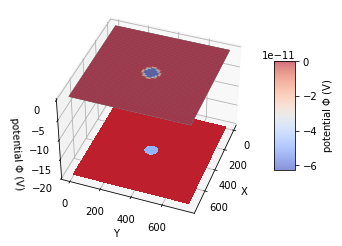

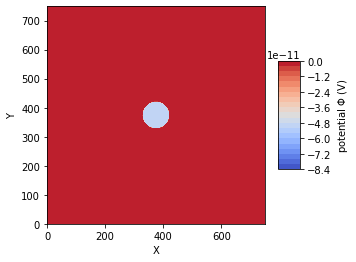

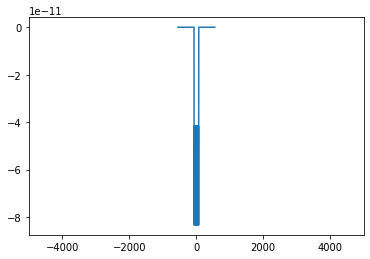

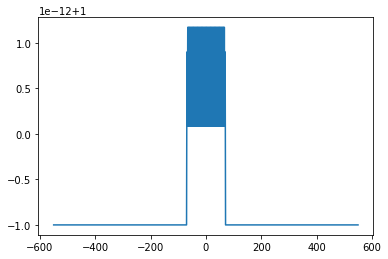

<Axes3DSubplot:xlabel='X', ylabel='Y'>

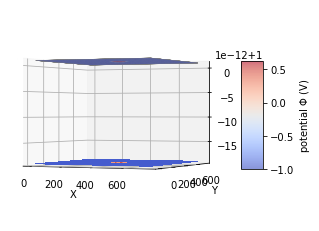

In [141]:
plot_surf(Phi, elevation=40, azimuth=20);
plot_contour(Phi)
xp = np.linspace(-px, px, num=Nmax)
plt.figure()
plt.plot(xp, Phi[:,int(Nmax/2)], label='100%')
#plt.plot(xp, Phi[:, int(Nmax/2)], label='30%')
plt.xlim(-5000, 5000)
plt.show()
plt.close()

#f1 = np.exp(-Zion*echarge*Phi/kT)
f1 = np.exp(-Zion*echarge*Phi/4e-16)


plt.figure()
plt.plot(xp, f1[:, int(Nmax/2)])
plt.show()
plot_surf(f1, elevation=0)

In [142]:
def laplacian2d(f, Delta=1):
    """Finite difference approximation of Del^2 f.
        
    Arguments
    ---------
    f : M x N matrix
    Delta : float
    
    Returns
    -------
    M x N matrix, boundaries set to 0
    """
    
    L = np.zeros_like(f, dtype=np.float64)
    L[1:-1, 1:-1] = f[2:, 1:-1] + f[:-2, 1:-1] + f[1:-1, 2:] + f[1:-1, :-2] - 4*f[1:-1, 1:-1]
    return L/Delta**2

def laplacian2dsimple(f, Delta=1):
    L = np.zeros_like(f, dtype=np.float64)
    for i in range(1, L.shape[0]-1):
        for j in range(1, L.shape[1]-1):
            L[i, j] = f[i+1, j] + f[i-1, j] + f[i, j+1] + f[i, j-1] - 4*f[i, j]            
    return L/Delta**2

In [143]:
import numpy as np

def test_laplacian2d():
    ftest = np.random.random((200, 200))
    assert np.allclose(laplacian2d(ftest), laplacian2dsimple(ftest))

test_laplacian2d()

In [144]:
rhox = - laplacian2d(Phi)/(4*np.pi)

In [145]:
print(rhox.min())
print(rhox.max())

-1.3263532246176735e-11
1.3263532246176734e-11


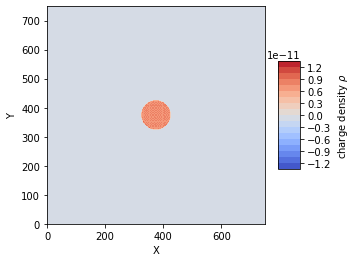

In [146]:
plot_contour(rhox, zlabel=r"charge density $\rho$");

In [147]:
plot_surf(rhox, zlabel=r"charge density $\rho$", elevation=20, azimuth=20, offset=-3);

Error in callback <function flush_figures at 0x000002DC3FA9D5E0> (for post_execute):


KeyboardInterrupt: 